In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

%matplotlib inline
import warnings
%config Completer.use_jedi = False

warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('Live.csv')
final=pd.read_csv('Live.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [5]:
data.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)
final.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [7]:
len(data['status_id'].unique())

6997

In [8]:
final.drop(['status_id','status_published'],axis=1,inplace=True)

data.drop(['status_id','status_published'],axis=1,inplace=True)

In [9]:
X=data
y=data['status_type']

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['status_type']=le.fit_transform(X['status_type'])
X

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [11]:
y

0       video
1       photo
2       video
3       photo
4       photo
        ...  
7045    photo
7046    photo
7047    photo
7048    photo
7049    photo
Name: status_type, Length: 7050, dtype: object

In [12]:
y=le.transform(y)

In [13]:
y

array([3, 1, 3, ..., 1, 1, 1])

In [14]:
col=X.columns
col

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [15]:
from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()
X=ms.fit_transform(X)

In [16]:
X=pd.DataFrame(X,columns=[col])
X


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [19]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

In [20]:
cluster_centres=pd.DataFrame(kmeans.cluster_centers_)
cluster_centres

,0,1,2,3,4,5,6,7,8,9
0,0.328507,0.039071,0.000755,0.000754,0.038544,0.002174,0.002437,0.001200,0.002753,0.001453
1,0.954922,0.064633,0.026703,0.029317,0.057123,0.047101,0.008186,0.009652,0.008042,0.007195


In [21]:
kmeans.inertia_

237.75726404419564

In [22]:
labels=kmeans.labels_

In [23]:
correct_labels=sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [24]:
correct_labels


63

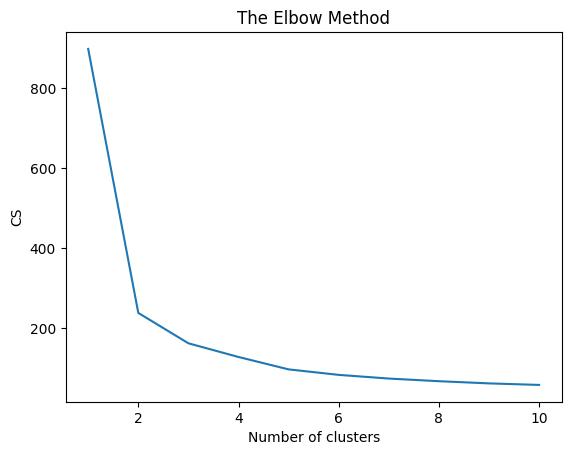

In [25]:
cs=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10,random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [26]:
kmeans=KMeans(n_clusters=3, init = 'k-means++', max_iter = 400, n_init = 20,random_state=0)
kmeans.fit(X)
correct_labels=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [27]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


In [28]:
llabel=pd.Series(kmeans.labels_)
llabel.unique()

array([0, 1, 3, 2])

In [29]:
final

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [30]:
final['Clusters']=kmeans.labels_

In [31]:
final


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Clusters
0,video,529,512,262,432,92,3,1,1,0,0
1,photo,150,0,0,150,0,0,0,0,0,1
2,video,227,236,57,204,21,1,1,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,1
4,photo,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,1
7046,photo,16,0,0,14,1,0,1,0,0,1
7047,photo,2,0,0,1,1,0,0,0,0,1
7048,photo,351,12,22,349,2,0,0,0,0,1


In [32]:
final[final['status_type']=='video']['Clusters'].value_counts()

0    2139
3     195
Name: Clusters, dtype: int64

In [33]:
final[final['status_type']=='photo']['Clusters'].value_counts()

1    4065
2     223
Name: Clusters, dtype: int64

In [34]:
final[final['status_type']=='link']['Clusters'].value_counts()

1    51
2    12
Name: Clusters, dtype: int64

In [35]:
final[final['status_type']=='status']['Clusters'].value_counts()

0    285
2     80
Name: Clusters, dtype: int64

In [36]:
from sklearn_extra.cluster import KMedoids

ModuleNotFoundError: No module named 'sklearn_extra'

In [ ]:
kmedoids=KMedoids(n_clusters=2,random_state=0)
kmedoids.fit(X)

In [ ]:
kmedoids.cluster_centers_

In [ ]:
labelsM = kmedoids.labels_
correct_labelsM=sum(y==labelsM)
print("Result: %d out of %d samples were correctly labeled." % (correct_labelsM,y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labelsM/float(y.size)))
correct_labelsM

In [ ]:
cs=[]
for i in range(1,11):
    kmedoids=KMedoids(n_clusters=i,init = "k-medoids++" ,max_iter = 300, random_state=0)
    kmedoids.fit(X)
    cs.append(kmedoids.inertia_)
plt.plot(range(1,11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

optimal clusters = 2 from elbow method